## Advanced Lane Finding Project

The goals / steps of this project are the following:

* **Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.**
* **Apply a distortion correction to raw images.**
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# Make a list of calibration images
# This code finds all in the local machine all the stated path and stores it into a list
images = glob.glob('../camera_cal/calibration*.jpg')

## The camera calibration code

More info can be found in the [OpenCV Camera Calibration]. Camera calibration must be done because different camera have different degree of distortion in them. This is due to different lens make, focal points etc. Even the same camera from the same brand and make will slightly differ.

Camera calibration can also help in determining the relation between the image pixels and real world unit length.

[OpenCV Camera Calibration]:https://docs.opencv.org/2.4/doc/tutorials/calib3d/camera_calibration/camera_calibration.html

Image with corner found: 17


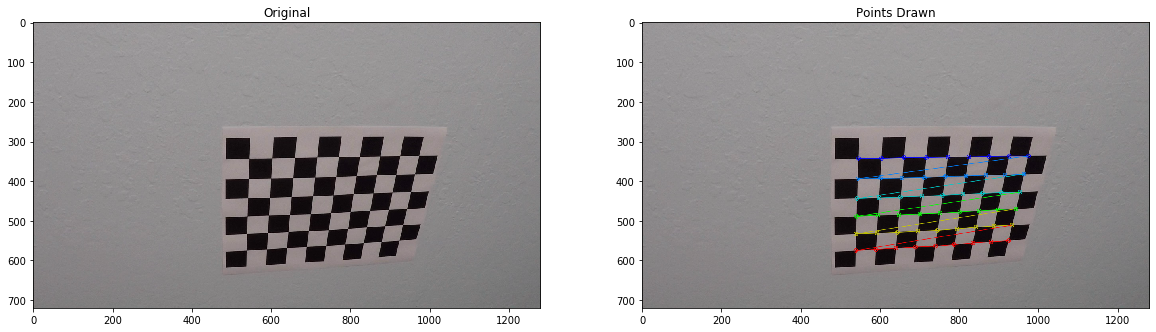

In [2]:
def calibrate_from_img(images):
    # For displaying purpose, only display the first image
    isfirst = True
    
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    # 6*9 because the checkerboard has 6 longitudinal and 9 lateral checkerbox intersections
    objp = np.zeros((6*9,3), np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.

    # Step through the list and search for chessboard corners
    for fname in images:
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

        # If found, add object points, image points
        if ret == True:            
            objpoints.append(objp)
            imgpoints.append(corners)

            # Draw and display the corners
            if isfirst:
                fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
                axes[0].imshow(img)
                axes[0].set_title('Original')
                drawn = cv2.drawChessboardCorners(img, (9,6), corners, ret)
                axes[1].imshow(drawn)
                axes[1].set_title('Points Drawn')
                isfirst = False
            else:
                drawn = cv2.drawChessboardCorners(img, (9,6), corners, ret)
                
            #cv2.imshow('img',img)
            cv2.waitKey(0)
    
    num_of_cali_img = len(imgpoints)
    print('Image with corner found: {}'.format(num_of_cali_img))
    
    quality = False
    if num_of_cali_img > 15:
        quality = True
        
    cv2.destroyAllWindows()
    
    return quality, objpoints, imgpoints, img.shape
    
ret, objpoints, imgpoints, imshape = calibrate_from_img(images)


## Visualization of the calibrated images

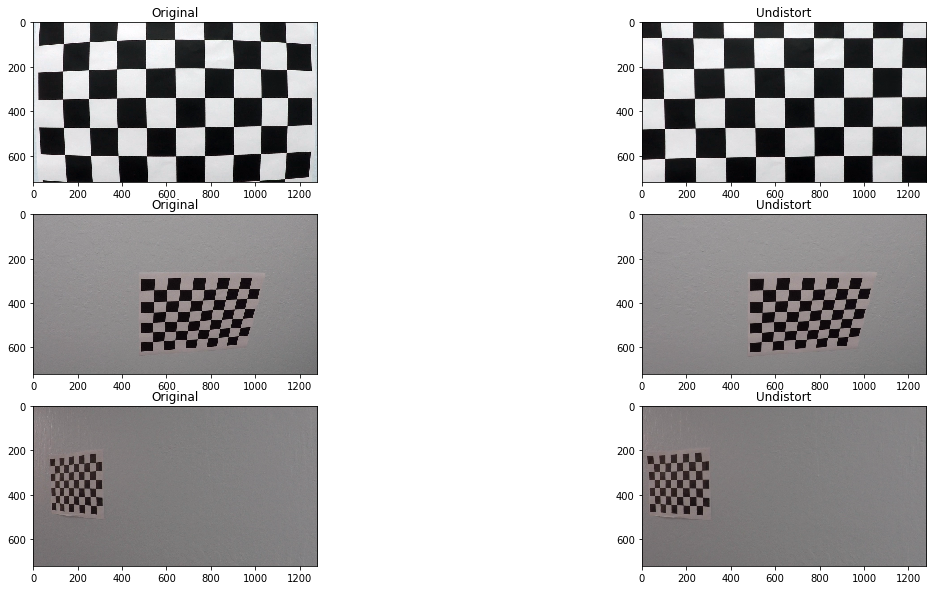

In [3]:
# If there is enough image sample points for camera calibration only it will run
if ret:
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, imshape[0:2], None, None)
    fig, axes = plt.subplots(3, 2, figsize=(20,10))
    
    for i in range(0,3):
        original = cv2.imread(images[i])
        undist = cv2.undistort(original, mtx, dist, None, mtx)
        axes[i][0].imshow(original)
        axes[i][0].set_title('Original')
        axes[i][1].imshow(undist)
        axes[i][1].set_title('Undistort')
      
else:
    print("Not enough image sample points! Please add more.")

## Serialize the calibration data using Python Pickle

In [16]:
import pickle

pickle.dump( {'mtx': mtx, 'dist': dist }, open('serialized_camera_calibration/camera_calibration.p','wb'))